In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#importing test and training data
df_train = pd.read_csv('/content/drive/MyDrive/BloodDonations_dataset/Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv')
df_test = pd.read_csv('/content/drive/MyDrive/BloodDonations_dataset/Warm_Up_Predict_Blood_Donations_-_Test_Data.csv')

In [ ]:
#viewing data
print(df_train.shape)
df_train.head()

(576, 6)


,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df_train.iloc[:, 1:5]
y = df_train[['Made Donation in March 2007']]

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
df_test.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,659,2,12,3000,52
1,276,21,7,1750,38
2,263,4,1,250,4
3,303,11,11,2750,38
4,83,4,12,3000,34


In [ ]:
X_test = df_test.iloc[:, 1:5]

In [ ]:
X_train = X_train.reset_index(drop = True)
X_cv = X_cv.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)

In [ ]:
#EXPLORATORY DATA ANALYSIS (checking for missing values)
X_train.isnull().sum()


Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
dtype: int64

In [ ]:
X_cv.isnull().sum()


Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
dtype: int64

In [ ]:
X_test.isnull().sum()


Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

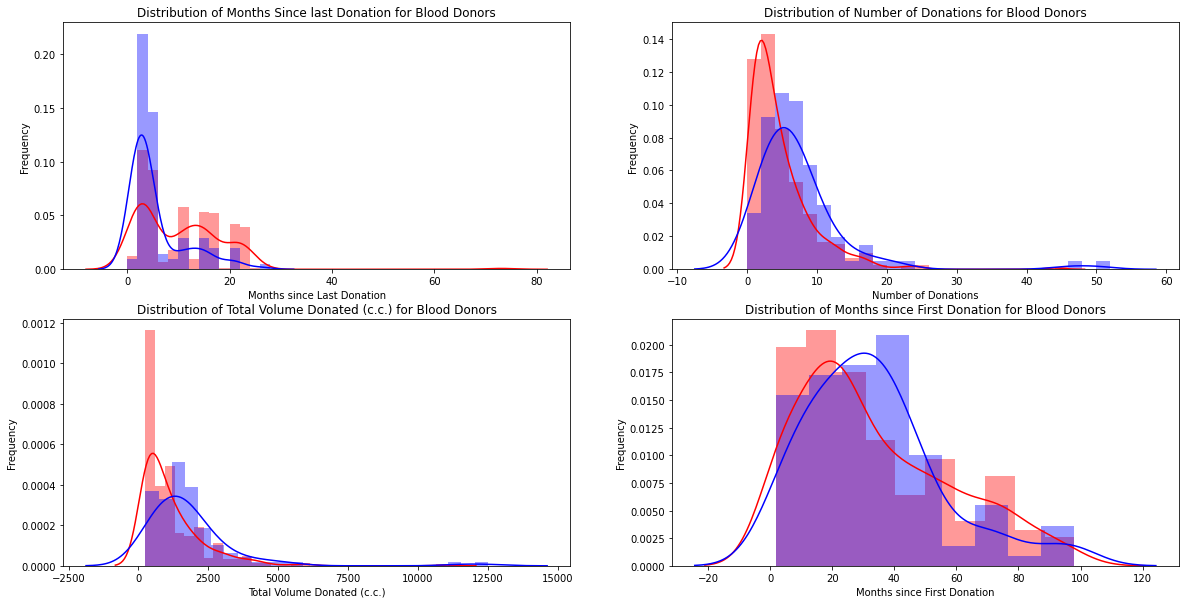

In [ ]:
#plot the distribution of the 4 different columns in the training data 
#red = non-donors
#blue = donors
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20, 10))
plt.subplot(2, 2, 1)
sns.distplot(X_train[y_train.values == 0]['Months since Last Donation'], 
             bins = range(0, 81, 2), color = 'red')
plt.ylabel('Frequency')
plt.title('Distribution of Months Since last Donation for Non-blood Donors')

sns.distplot(X_train[y_train.values == 1]['Months since Last Donation'], 
             bins = range(0, 81, 2), color = 'blue')
plt.ylabel('Frequency')
plt.title('Distribution of Months Since last Donation for Blood Donors')

plt.subplot(2, 2, 2)
sns.distplot(X_train[y_train.values == 0]['Number of Donations'], 
             bins = range(0, 60, 2), color = 'red')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Donations for Non-blood Donors')

sns.distplot(X_train[y_train.values == 1]['Number of Donations'], 
             bins = range(0, 60, 2), color = 'blue')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Donations for Blood Donors')

plt.subplot(2, 2, 3)
sns.distplot(X_train[y_train.values == 0]['Total Volume Donated (c.c.)'], color = 'red')
plt.ylabel('Frequency')
plt.title('Distribution of Total Volume Donated (c.c.) for Non-blood Donors')

sns.distplot(X_train[y_train.values == 1]['Total Volume Donated (c.c.)'], color = 'blue')
plt.ylabel('Frequency')
plt.title('Distribution of Total Volume Donated (c.c.) for Blood Donors')

plt.subplot(2, 2, 4)
sns.distplot(X_train[y_train.values == 0]['Months since First Donation'], color = 'red')
plt.ylabel('Frequency')
plt.title('Distribution of Months since First Donation for Non-blood Donors')

sns.distplot(X_train[y_train.values == 1]['Months since First Donation'], color = 'blue')
plt.ylabel('Frequency')
plt.title('Distribution of Months since First Donation for Blood Donors')

plt.show()


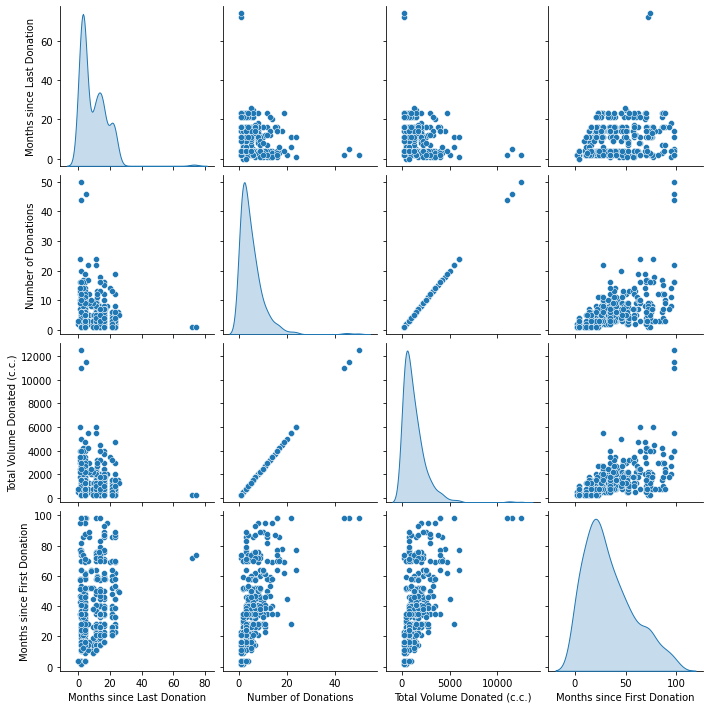

In [ ]:
#examine the relationship across the 4 features in the training dataset, by means of a pairsplot
sns.pairplot(X_train, diag_kind='kde')
plt.show()

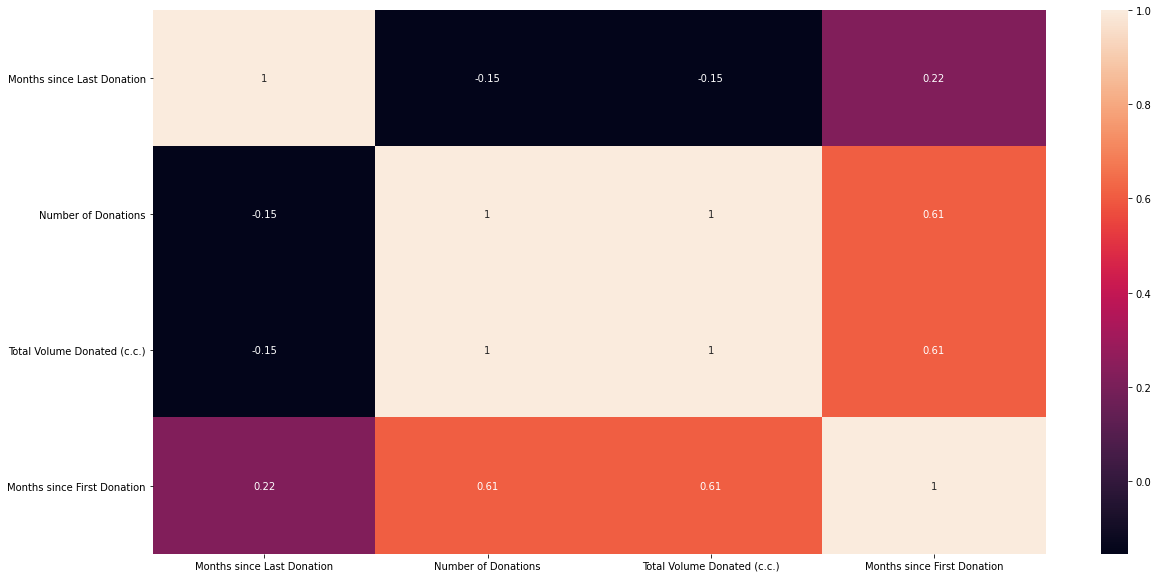

In [ ]:
#the pairsplot seem to suggest a linear relationship between the 2 variables, Total Number of Donations and Total Volume Donated. 
#checking correlation using heat map
plt.figure(figsize = (20, 10))
X_train_corr = X_train.corr()

sns.heatmap(X_train_corr, annot = True)
plt.show()

In [ ]:
#Feature Engineering and Feature Selection
X_train['Average Donation per Month'] = (X_train['Total Volume Donated (c.c.)']/
                                         X_train['Months since First Donation'])

In [ ]:
X_cv['Average Donation per Month'] = (X_cv['Total Volume Donated (c.c.)']/
                                         X_cv['Months since First Donation'])

In [ ]:
X_test['Average Donation per Month'] = (X_test['Total Volume Donated (c.c.)']/
                                         X_test['Months since First Donation'])

In [ ]:
X_train.head()


,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Average Donation per Month
0,4,4,1000,18,55.555556
1,2,1,250,2,125.000000
2,20,14,3500,69,50.724638
3,2,2,500,11,45.454545
4,11,4,1000,58,17.241379


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


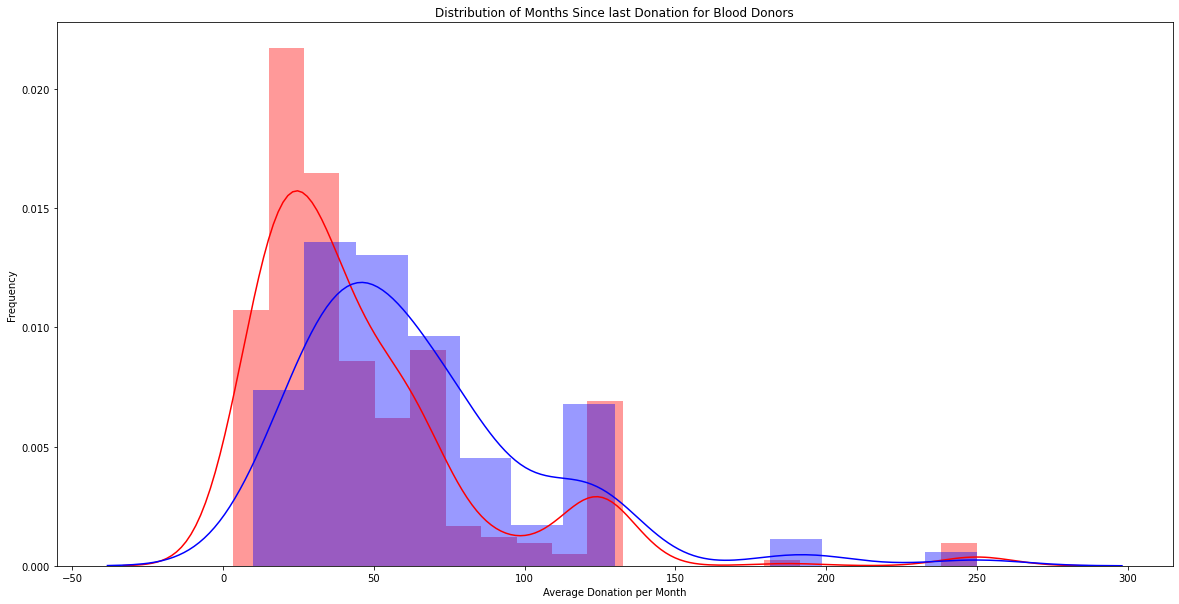

In [ ]:
plt.figure(figsize = (20, 10))

sns.distplot(X_train[y_train.values == 0]['Average Donation per Month'], color = 'red')
plt.ylabel('Frequency')
plt.title('Distribution of Months Since last Donation for Non-blood Donors')

sns.distplot(X_train[y_train.values == 1]['Average Donation per Month'], color = 'blue')
plt.ylabel('Frequency')
plt.title('Distribution of Months Since last Donation for Blood Donors')

plt.show()

From the plot, it does appear that donors who, on average, donate more than 50 ml of blood per month are more likely to donate blood.

In [ ]:

X_train['Waiting Time'] = ((X_train['Months since First Donation'] - X_train['Months since Last Donation'])
                           /X_train['Number of Donations'])

X_cv['Waiting Time'] = ((X_cv['Months since First Donation'] - X_cv['Months since Last Donation'])
                        /X_cv['Number of Donations'])

X_test['Waiting Time'] = ((X_test['Months since First Donation'] - X_test['Months since Last Donation'])
                          /X_test['Number of Donations'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


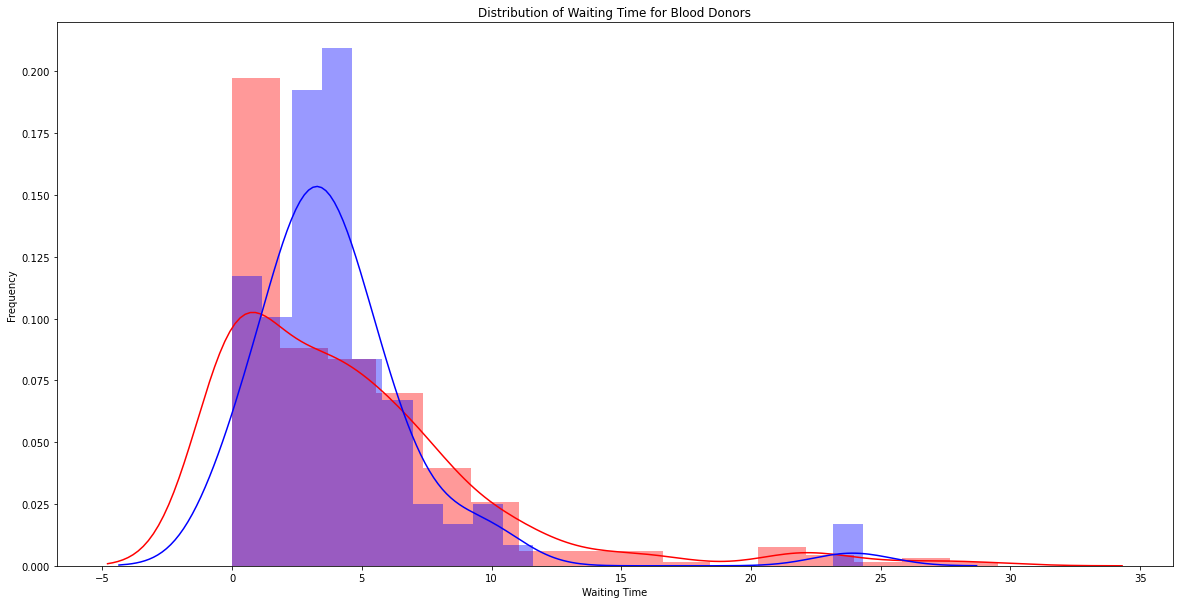

In [ ]:
plt.figure(figsize = (20, 10))

sns.distplot(X_train[y_train.values == 0]['Waiting Time'], color = 'red')
plt.ylabel('Frequency')
plt.title('Distribution of Waiting Time for Non-blood Donors')

sns.distplot(X_train[y_train.values == 1]['Waiting Time'], color = 'blue')
plt.ylabel('Frequency')
plt.title('Distribution of Waiting Time for Blood Donors')

plt.show()

Donors with Waiting Time of less than 2 months are much more likely to donated blood than their counterpart

In [ ]:
#now checking for one time donors
X_train['One-time Donor'] = X_train['Number of Donations'] == 1
tab = pd.crosstab(X_train['One-time Donor'], y_train['Made Donation in March 2007'])

tab.div(tab.sum(1).astype(float), axis=0)

Made Donation in March 2007,0,1
One-time Donor,,
False,0.735593,0.264407
True,0.753247,0.246753


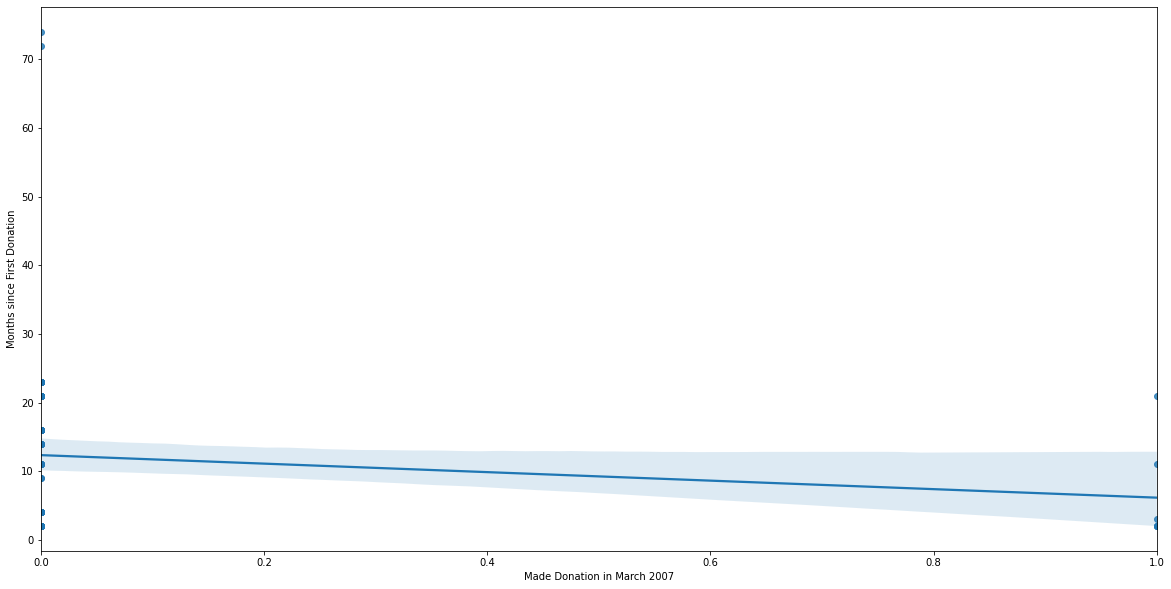

In [ ]:
plt.figure(figsize = (20, 10))
sns.regplot(x = y_train.reset_index(drop = True)[X_train['One-time Donor'] == 1],
            y = X_train[X_train['One-time Donor'] == 1]['Months since First Donation']) 

plt.show()

In [ ]:
del X_train['One-time Donor'] #as it is not statistically significant

In [ ]:
X_train['Donated in the past 3-6 months'] = ((X_train['Months since Last Donation'] >= 3) &
                                             (X_train['Months since Last Donation'] <= 6))

X_cv['Donated in the past 3-6 months'] = ((X_cv['Months since Last Donation'] >= 3) &
                                          (X_cv['Months since Last Donation'] <= 6))

X_test['Donated in the past 3-6 months'] = ((X_test['Months since Last Donation'] >= 3) &
                                            (X_test['Months since Last Donation'] <= 6))

In [ ]:
X_train['Frequent Donor'] = (X_train['Number of Donations'] >= 5)

X_cv['Frequent Donor'] = (X_cv['Number of Donations'] >= 5)

X_test['Frequent Donor'] = (X_test['Number of Donations'] >= 5)

In [ ]:
X_train.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Average Donation per Month,Waiting Time,Donated in the past 3-6 months,Frequent Donor
0,4,4,1000,18,55.555556,3.50,True,False
1,2,1,250,2,125.000000,0.00,False,False
2,20,14,3500,69,50.724638,3.50,False,True
3,2,2,500,11,45.454545,4.50,False,False
4,11,4,1000,58,17.241379,11.75,False,False


In [ ]:
X_cv.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Average Donation per Month,Waiting Time,Donated in the past 3-6 months,Frequent Donor
0,2,8,2000,38,52.631579,4.500000,False,True
1,2,11,2750,79,34.810127,7.000000,False,True
2,2,5,1250,63,19.841270,12.200000,False,True
3,16,1,250,16,15.625000,0.000000,False,False
4,16,3,750,35,21.428571,6.333333,False,False


In [ ]:
#deleting the column for total volume donated (c.c)
del X_cv['Total Volume Donated (c.c.)']

In [ ]:
del X_test['Total Volume Donated (c.c.)']

In [ ]:
del X_train['Total Volume Donated (c.c.)']

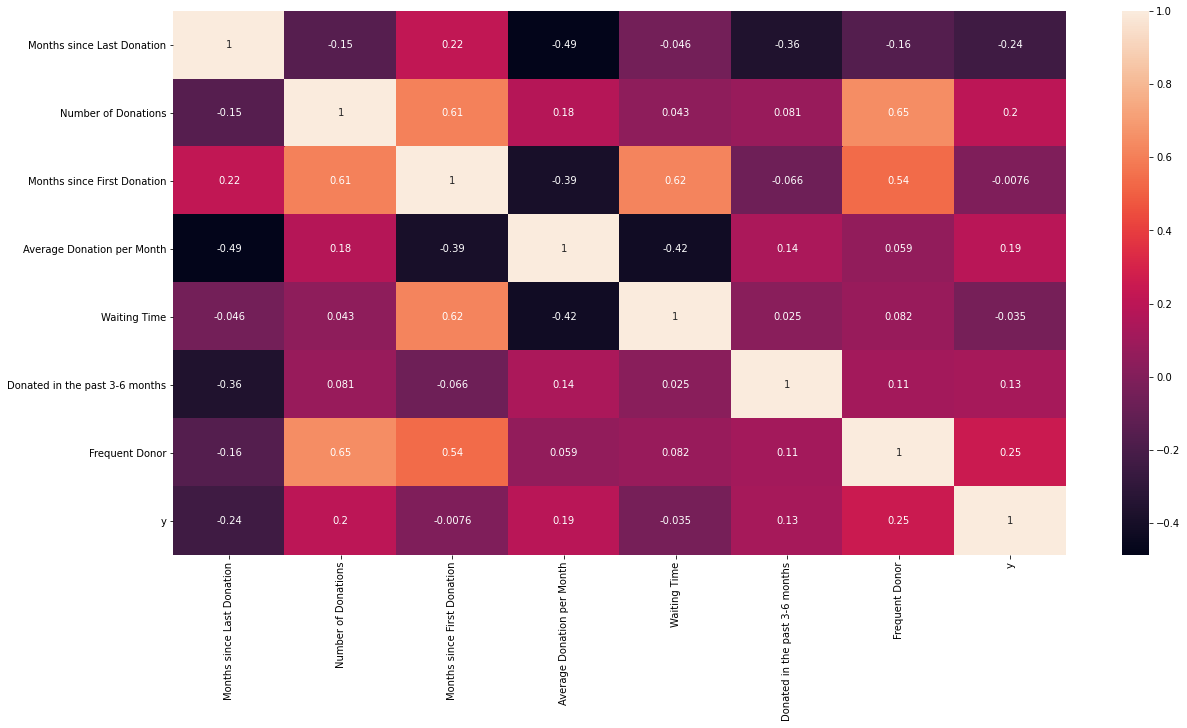

In [ ]:
plt.figure(figsize = (20, 10))
train_ = X_train.copy(); train_['y'] = y_train.reset_index(drop = True)
train_corr = train_.corr()

sns.heatmap(train_corr, annot = True)
plt.show()

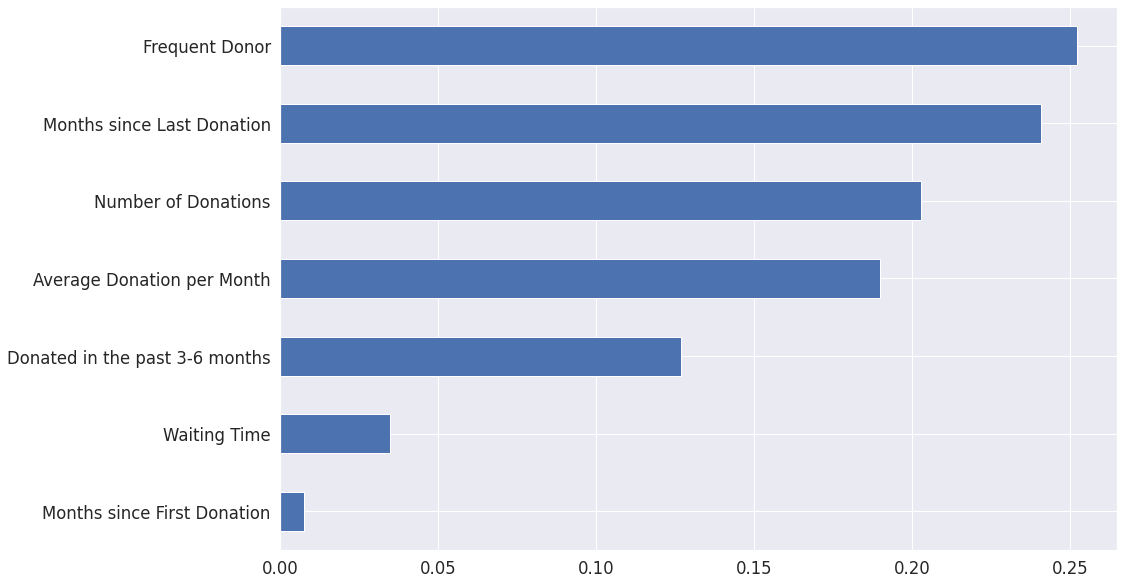

In [ ]:
plt.figure(figsize = (15, 10))
sns.set(font_scale = 1.5)
(abs(train_corr)
 .y
 .drop('y')
 .sort_values()
 .plot
 .barh())
plt.show()

In [ ]:
#Model Fitting
#we fit 4 different kinds of models - Logistic Regression, Random Forest, SVM and Gradient Boosting (AdaBoost).
from sklearn.linear_model import LogisticRegressionCV # Logistic Regression
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import AdaBoostClassifier # Gradient Boosting (AdaBoost)
from sklearn.svm import SVM # Support Vector Machine

ImportError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install libsvm

In [ ]:
#conduct feature normalization on our dataset using standardScalar
from sklearn.preprocessing import StandardScaler

numericFeatures = ['Months since Last Donation', 'Number of Donations', 
                   'Average Donation per Month', 'Waiting Time', 'Months since First Donation']
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numericFeatures]))
X_cv_scaled = pd.DataFrame(scaler.transform(X_cv[numericFeatures]))
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numericFeatures]))

In [ ]:
X_cv.head()

,Months since Last Donation,Number of Donations,Months since First Donation,Average Donation per Month,Waiting Time,Donated in the past 3-6 months,Frequent Donor
0,2,8,38,52.631579,4.500000,False,True
1,2,11,79,34.810127,7.000000,False,True
2,2,5,63,19.841270,12.200000,False,True
3,16,1,16,15.625000,0.000000,False,False
4,16,3,35,21.428571,6.333333,False,False


In [ ]:
from sklearn.preprocessing import LabelEncoder

factorVar = ['Frequent Donor', 'Donated in the past 3-6 months']

le = LabelEncoder()

for i in factorVar:
    X_train_scaled[i] = le.fit_transform(X_train[i])
    X_cv_scaled[i] = le.transform(X_cv[i])
    X_test_scaled[i] = le.transform(X_test[i])

In [ ]:
# Model 1 - Logistic Regression
from sklearn.linear_model import LogisticRegressionCV

logregr = LogisticRegressionCV(cv = 5, random_state=12, scoring ='neg_log_loss')
logregr = logregr.fit(X_train_scaled, y_train['Made Donation in March 2007'])

y_cv_logregr = logregr.predict_proba(X_cv_scaled)[:, 1]

In [ ]:
# Model 2 - RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

randomforest = RandomForestClassifier(random_state = 10)
param_grid = {'n_estimators': [50, 100, 150],
              'max_features': [1, 2, 3]}
rf = GridSearchCV(estimator = randomforest, param_grid = param_grid, cv = 5,
                  scoring = 'neg_log_loss')
rf.fit(X_train_scaled, y_train['Made Donation in March 2007'])

y_cv_rf = rf.predict_proba(X_cv_scaled)[:, 1]

In [ ]:
# Model 3 - AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

abc = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1),
                         random_state = 10)
param_grid = {'n_estimators': [50, 100, 150],
              'algorithm': ['SAMME', 'SAMME.R']}
abc = GridSearchCV(abc, param_grid = param_grid, cv = 5,
                   scoring = 'neg_log_loss')

abc.fit(X_train_scaled, y_train['Made Donation in March 2007'])

y_cv_abc = abc.predict_proba(X_cv_scaled)[:, 1]

In [ ]:
# Model 4 - Support Vector Machine
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC(probability = True)
param_grid = {'kernel': ['rbf', 'linear'],
              'gamma': np.logspace(-4, 1, 10),
              'random_state': [10]}
svm = GridSearchCV(svm, param_grid = param_grid, cv = 5,
                   scoring = 'neg_log_loss')

svm.fit(X_train_scaled, y_train['Made Donation in March 2007'])

y_cv_svm = svm.predict_proba(X_cv_scaled)[:, 1]

In [ ]:
#entropy loss (or logistic loss) as our evaluation metric
from sklearn.metrics import log_loss

# Logistic Regression
print ('Logistic Regression - Entropy Loss: ', log_loss(y_cv, y_cv_logregr))

# Random Forest
print ('Random Forest - Entropy Loss: ', log_loss(y_cv, y_cv_rf))

# AdaBoost
print ('Gradient Boosting - Entropy Loss: ', log_loss(y_cv, y_cv_abc))

# Support Vector Machine
print ('Support Vector Machine - Entropy Loss: ', log_loss(y_cv, y_cv_svm))

Logistic Regression - Entropy Loss:  0.5394600379192298
Random Forest - Entropy Loss:  1.9741593268831445
Gradient Boosting - Entropy Loss:  0.6260526577291643
Support Vector Machine - Entropy Loss:  0.5849439213335899


In [ ]:
#prediction
X_total = pd.concat([pd.DataFrame(X_train_scaled), pd.DataFrame(X_cv_scaled)])
y_total = pd.concat([y_train, y_cv]).values

final_model = logregr.fit(X_total, y_total)
y_test = final_model.predict_proba(X_test_scaled)[:, 1]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print (y_test.mean(), df_train['Made Donation in March 2007'].values.mean())

0.2390494238069744 0.23958333333333334


In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/BloodDonations_dataset/Warm_Up_Predict_Blood_Donations_-_Submission_Format.csv', index_col = 0)
submission['Made Donation in March 2007'] = y_test

In [ ]:

submission.to_csv('test_submission.csv')